In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv(r'cleaned_data.csv')
df.head()

,Date,TEL_BIO,ADP_SYK,ON_MU,ROST_VFC,CDW_T,PAYX_RTX,APH_STE,NDSN_STE,CAH_NEM,CEG_NEM,DIS_NEM,IT_NEM,NRG_NEM,SCHW_NEM,TT_NEM
0,2022-02-23,0.239509,0.771140,0.663637,1.560298,9.729875,1.237427,0.326856,0.983616,0.781127,0.636250,2.170135,4.069952,0.537846,1.220489,2.195844
1,2022-02-24,0.234301,0.774126,0.689893,1.592246,10.004847,1.227451,0.326426,0.963968,0.784539,0.671616,2.273621,4.282290,0.570192,1.244242,2.280275
2,2022-02-25,0.223696,0.766083,0.707117,1.601182,10.073827,1.208059,0.322575,0.955513,0.796171,0.653839,2.236053,4.284883,0.557495,1.274335,2.292504
3,2022-02-28,0.225564,0.773484,0.706936,1.594907,9.877013,1.158270,0.315486,0.940690,0.813754,0.702244,2.277063,4.301050,0.569553,1.287397,2.339218
4,2022-03-01,0.217456,0.767553,0.693815,1.633461,9.768311,1.143246,0.311195,0.937899,0.763564,0.700168,2.143734,4.038225,0.527591,1.138470,2.216707


In [3]:
df.shape

(126, 16)

In [4]:
# we check TEL_BIO first
df_tel_bio=df[["Date","TEL_BIO"]]
df_tel_bio.head()

,Date,TEL_BIO
0,2022-02-23,0.239509
1,2022-02-24,0.234301
2,2022-02-25,0.223696
3,2022-02-28,0.225564
4,2022-03-01,0.217456


In [5]:
df_tel_bio.shape #X.shape

(126, 2)

In [6]:
df_tel_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     126 non-null    object 
 1   TEL_BIO  126 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


## Spliting Data in Train and Validation

In [7]:
length_data = len(df_tel_bio)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length:", length_train)
print("Validation data lenth:", length_validation)

Data length : 126
Train data length: 88
Validation data lenth: 38


In [8]:
# train_data
train_data = df_tel_bio[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,TEL_BIO
0,2022-02-23,0.239509
1,2022-02-24,0.234301
2,2022-02-25,0.223696
3,2022-02-28,0.225564
4,2022-03-01,0.217456
...,...,...
83,2022-06-23,0.227687
84,2022-06-24,0.232164
85,2022-06-27,0.230585
86,2022-06-28,0.231131


In [9]:
# validation_data
validation_data = df_tel_bio[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,TEL_BIO
88,2022-06-30,0.227644
89,2022-07-01,0.220056
90,2022-07-05,0.219389
91,2022-07-06,0.220271
92,2022-07-07,0.223118
93,2022-07-08,0.221547
94,2022-07-11,0.215217
95,2022-07-12,0.224959
96,2022-07-13,0.226481
97,2022-07-14,0.229444


## Creating Train Dataset from Train split

In [10]:
dataset_train = train_data.TEL_BIO.values
dataset_train.shape

(88,)

In [11]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(88, 1)

## Normalization / Feature Scaling

In [12]:
# Dataset values will be in between 0 and 1 after scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(88, 1)

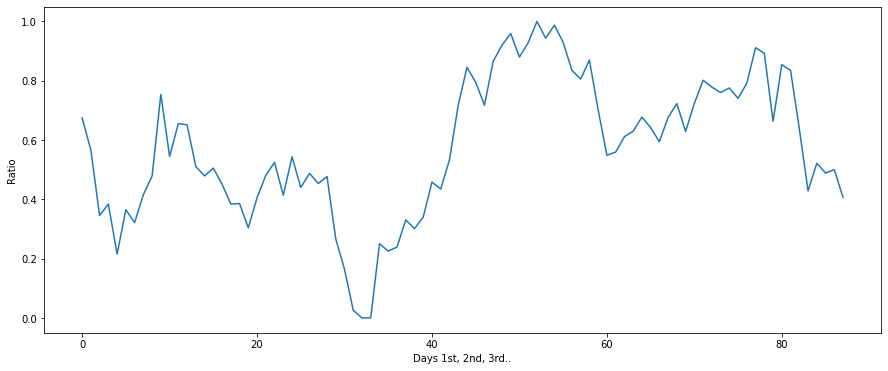

In [14]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days 1st, 2nd, 3rd..")
plt.ylabel("Ratio")
plt.show()

## Creating X_train and y_train from Train data

We have train data composed of ratios over days

So, it has 1184 ratios corresponding 1184 days

My aim is to predict the ratio (closing) of the next day.

I can use a time step of 2 days.

I will pick first 2 ratios (day 0 to 2), 1st 2 ratio will be in 
X_train data

Then predict the ratio of 3rd day; and 3rd ratio will be in y_train data

Again, i will pick ratios from 1 to 3, those will be in X_train data

Then predict the next days ratio, 4th ratio will be in y_train data



In [15]:
X_train = []
y_train = []

time_step = 2

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (86, 2)
Shape of y_train before reshape : (86,)


In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (86, 2, 1)
Shape of y_train after reshape : (86, 1)


Shape of X_train : 1134 x 50 x 1
That means we have 1134 rows, each row has 50 rows and 1 column
Lets check the first row: it has 50 rows (ratio of 49 days)

In [18]:
X_train[0]

array([[0.67470518],
       [0.5662432 ]])

Check the first item in y_train
It is the ratio of 2nd day

In [19]:
y_train[0]

array([0.34541468])

## Creating RNN model

In [20]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

2022-08-25 17:56:54.583523: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 17:56:54.861821: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
3/3 [==============================] - 14s 3ms/step - loss: 0.2734 - accuracy: 0.0116
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.0273
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.0273
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1351 - accuracy: 0.0273
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.0351
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.0233
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.0155
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.0273
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.0097
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.0155
Epoch 11/50
3/3 [=====================

## Evaluating Model

In [21]:
# Losses
history.history["loss"]

[0.24331802129745483,
 0.2004673033952713,
 0.10472385585308075,
 0.1403830498456955,
 0.13090373575687408,
 0.11880390346050262,
 0.09474027156829834,
 0.11820869892835617,
 0.0916285514831543,
 0.06714871525764465,
 0.0656265914440155,
 0.0614180713891983,
 0.05133163556456566,
 0.053414903581142426,
 0.05134417861700058,
 0.04710543528199196,
 0.060119763016700745,
 0.03105597384274006,
 0.04505402594804764,
 0.05740668997168541,
 0.04030274599790573,
 0.02417900040745735,
 0.04785793274641037,
 0.03941495344042778,
 0.043045803904533386,
 0.05334752798080444,
 0.03595393896102905,
 0.036333221942186356,
 0.0590733140707016,
 0.03392885625362396,
 0.040559060871601105,
 0.03749990835785866,
 0.03429349884390831,
 0.03178709000349045,
 0.0352192297577858,
 0.021086426451802254,
 0.03655462712049484,
 0.031035440042614937,
 0.032346658408641815,
 0.03594816103577614,
 0.036360062658786774,
 0.037038326263427734,
 0.029263468459248543,
 0.028325041756033897,
 0.04351392388343811,
 0.03

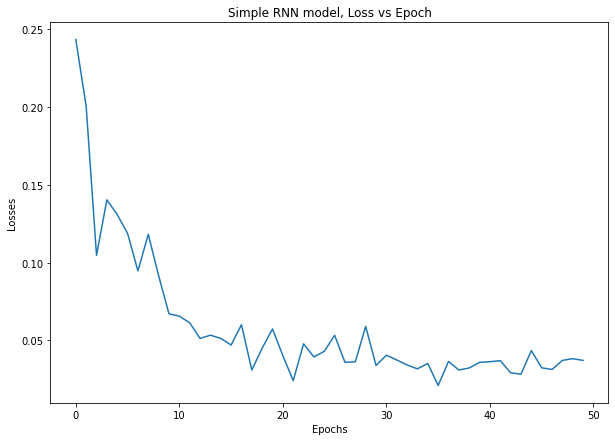

In [22]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

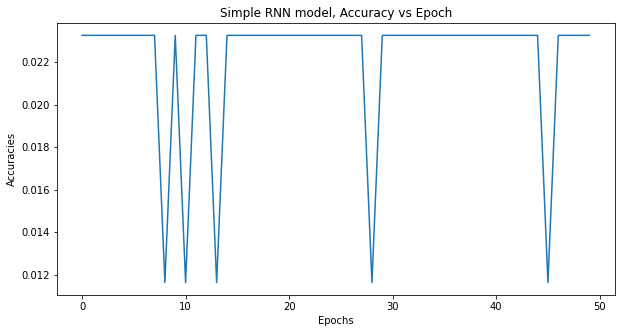

In [23]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data¶


In [24]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

(86, 1)

In [25]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(86, 1)

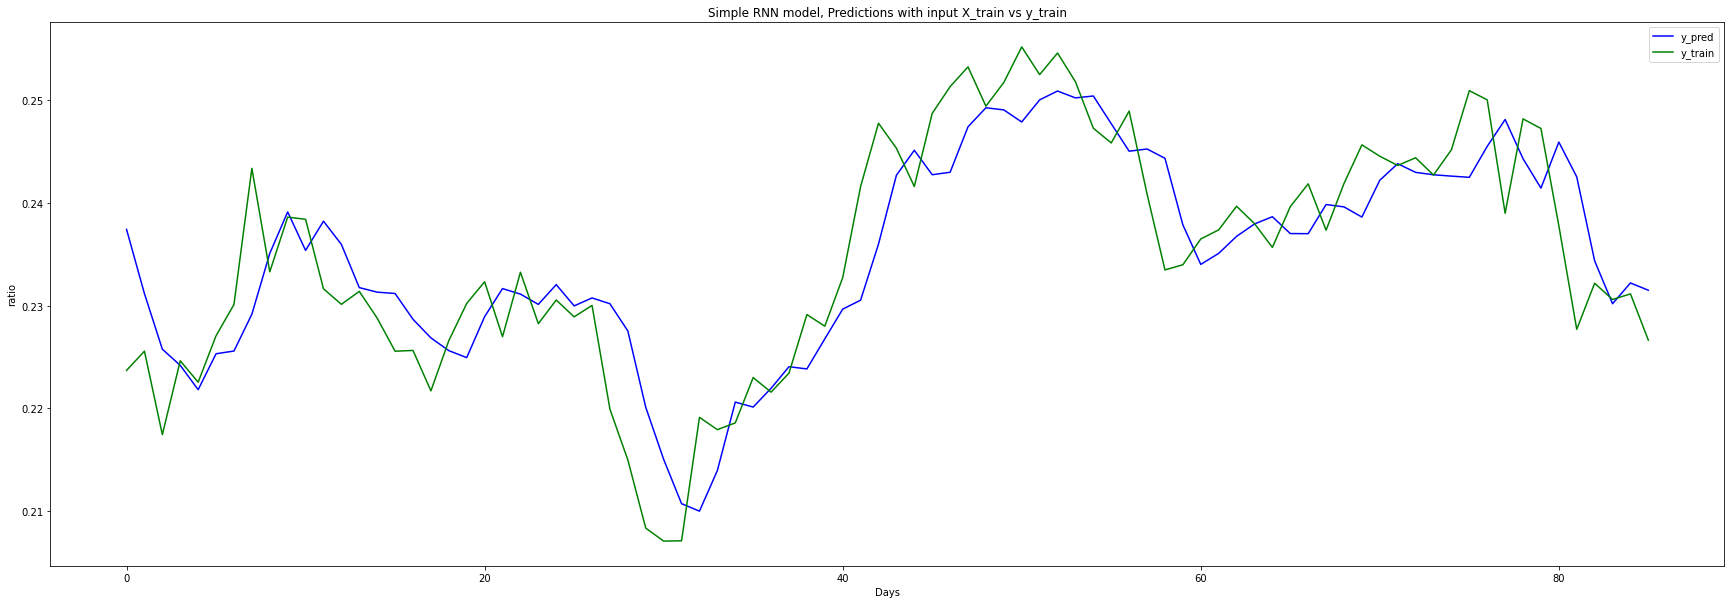

In [26]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("ratio")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()



## Creating Test Dataset from Validation Data

In [27]:
#Converting array and scaling
dataset_validation = validation_data.TEL_BIO.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (38, 1)


In [28]:
#Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [29]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [30]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (36, 2)
Shape of y_test before reshape : (36,)


In [31]:
#reshape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [32]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (36, 2, 1)
Shape of y_test after reshape : (36, 1)


## Evaluating with Validation Data

In [33]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (36, 1)


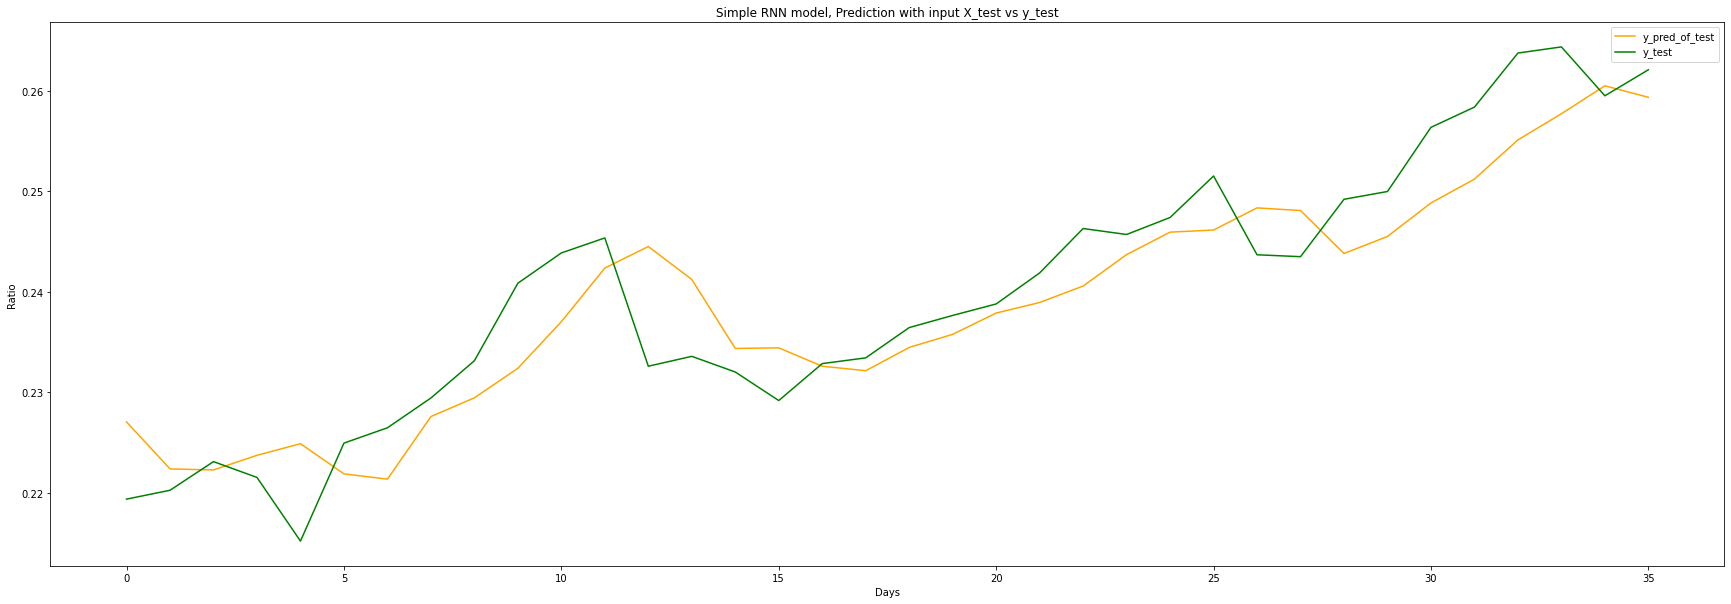

In [34]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

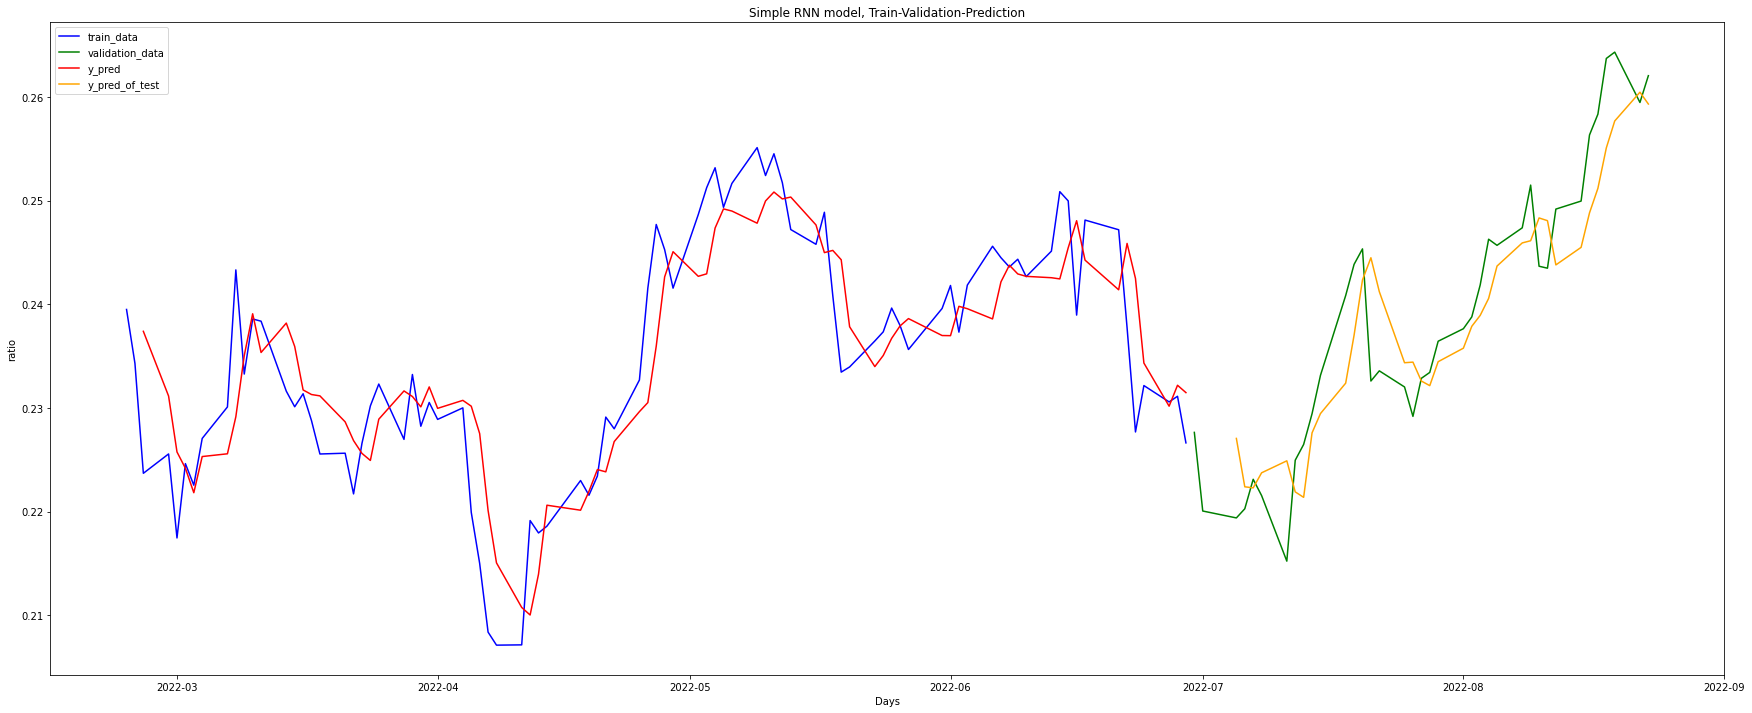

In [35]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.TEL_BIO, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.TEL_BIO, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("ratio")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

## Creating LSTM Model

In [36]:
y_train = scaler.fit_transform(y_train)

In [37]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
9/9 [==============================] - 2s 3ms/step - loss: 0.3186 - accuracy: 0.0112 
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.0087
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.0173
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.0382
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.0178
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.0137
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.0090
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.0232
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.0173
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.0340


## Evaluating LSTM Model

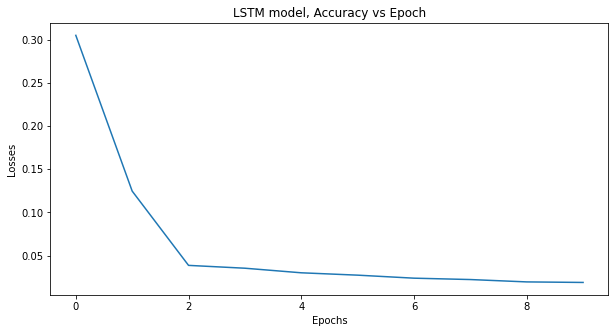

In [38]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

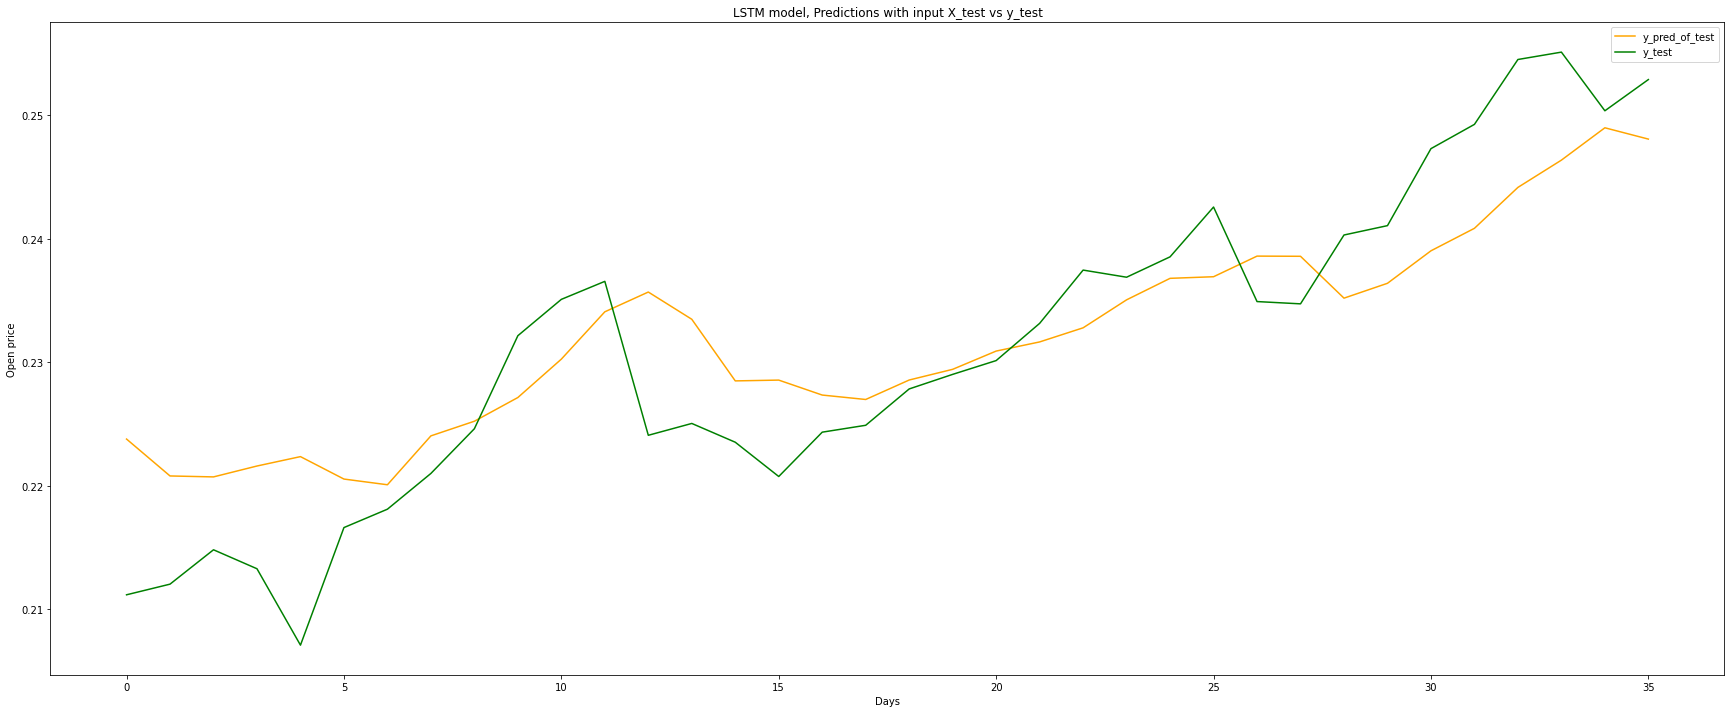

In [39]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

## Future price prediction

In [40]:
#Which day is the last day in our data?
df_tel_bio.iloc[-1]

Date       2022-08-23
TEL_BIO      0.262075
Name: 125, dtype: object

We can predict the ratio for the day after 2022-08-23--> for 2022-08-24.

We will use last ratios as input of our model for this prediction.

In [46]:
X_input = df_tel_bio.iloc[-time_step:].TEL_BIO.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (2))                    # reshaping : converting to 1D array ###PROVE THIS
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (2,)


array([0., 1.])

In [42]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, ratio for 2022-08-24      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

ValueError: in user code:

    /Users/simoneritter/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /Users/simoneritter/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /Users/simoneritter/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /Users/simoneritter/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/simoneritter/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
